In [1]:
source('../../code/xcms.helper/xcms_helper.r')

Loading required package: ggplot2
Loading required package: xcms
Loading required package: mzR
Loading required package: Rcpp
Warning message in fun(libname, pkgname):
"mzR has been built against a different Rcpp version (0.12.6)
than is installed on your system (0.12.7). This might lead to errors
when loading mzR. If you encounter such issues, please send a report,
including the output of sessionInfo() to the Bioc support forum at 
https://support.bioconductor.org/. For details see also
https://github.com/sneumann/mzR/wiki/mzR-Rcpp-compiler-linker-issue."Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:stats':

    IQR, mad, xtabs

The following ob

In [2]:
require(janitor)

peptides <- 
    read.xlsx('MSRT1_peptides.xlsx', sheetIndex = 1, stringsAsFactors = F) %>% 
        clean_names()

names(peptides) <- c('peptide', 'labeled_residue', 'm', 1, 2, 3)

peptides %<>% 
    mutate(peptide = factor(peptide, levels = peptide)) %>%
    group_by(peptide) %>% 
    gather(charge, mz, `1`:`3`) %>% 
    mutate(mz = round(mz, 4)) %>%
    mutate(len = nchar(peptide %>% as.character) - 2)

peptides %>% head(50)

Loading required package: janitor


peptide,labeled_residue,m,charge,mz,len
RGDSPASSP[K],[K],1008.5088,1,1009.5160,10
GLV[K],[K],423.2938,1,424.3010,4
LGGNETQV[R],[R],982.5078,1,983.5150,9
AEFAEVS[K],[K],887.4488,1,888.4560,8
SGFSSVSVS[R],[R],1021.5078,1,1022.5150,10
ADEGISF[R],[R],903.4328,1,904.4400,8
DISLSDY[K],[K],947.4698,1,948.4770,8
LVNEVTEFA[K],[K],1156.6228,1,1157.6300,10
DQGGELLSL[R],[R],1096.5758,1,1097.5830,10
GLFIIDD[K],[K],927.5158,1,928.5230,8


In [3]:
peptides %$% mz %>% paste(collapse = ', ') 

[1] "1009.516, 424.301, 983.515, 888.456, 1022.515, 904.44, 948.477, 1157.63, 1097.583, 928.523, 1118.56, 1206.64, 2177.137, 1676.983, 505.2616, 212.6541, 492.2611, 444.7316, 511.7611, 452.7236, 474.7421, 579.3186, 549.2951, 464.7651, 559.7836, 603.8236, 1089.0721, 838.9951, 337.1768, 142.1051, 328.5098, 296.8235, 341.5098, 302.1515, 316.8305, 386.5481, 366.5325, 310.1791, 373.5248, 402.8848, 726.3838, 559.6658"

In [4]:
cgrams <- 
    parse_agilent_cgram_csv('saved_data/MSRT_EICs.csv') %>%
        mutate(mz = str_replace_all(mzs, '[^.0-9]*', '') %>% as.numeric) %>%
        filter(!is.na(mz)) %>% 
        left_join(peptides, by = 'mz')

In [8]:
cgrams %>% head
cgrams %>% dim

time,intensity,signal,file,mzs,mz,peptide,labeled_residue,m,charge,len
2.6,0,+ESI,MSRT_m001.d,EIC(142.1051),142.1051,GLV[K],[K],423.2938,3,4
3.0,0,+ESI,MSRT_m001.d,EIC(142.1051),142.1051,GLV[K],[K],423.2938,3,4
3.4,0,+ESI,MSRT_m001.d,EIC(142.1051),142.1051,GLV[K],[K],423.2938,3,4
3.8,0,+ESI,MSRT_m001.d,EIC(142.1051),142.1051,GLV[K],[K],423.2938,3,4
4.2,0,+ESI,MSRT_m001.d,EIC(142.1051),142.1051,GLV[K],[K],423.2938,3,4
4.6,0,+ESI,MSRT_m001.d,EIC(142.1051),142.1051,GLV[K],[K],423.2938,3,4


[1] 37842    11

Warning message:
"Removed 1944 rows containing missing values (geom_path)."

Warning message:
"Removed 1944 rows containing missing values (geom_path)."

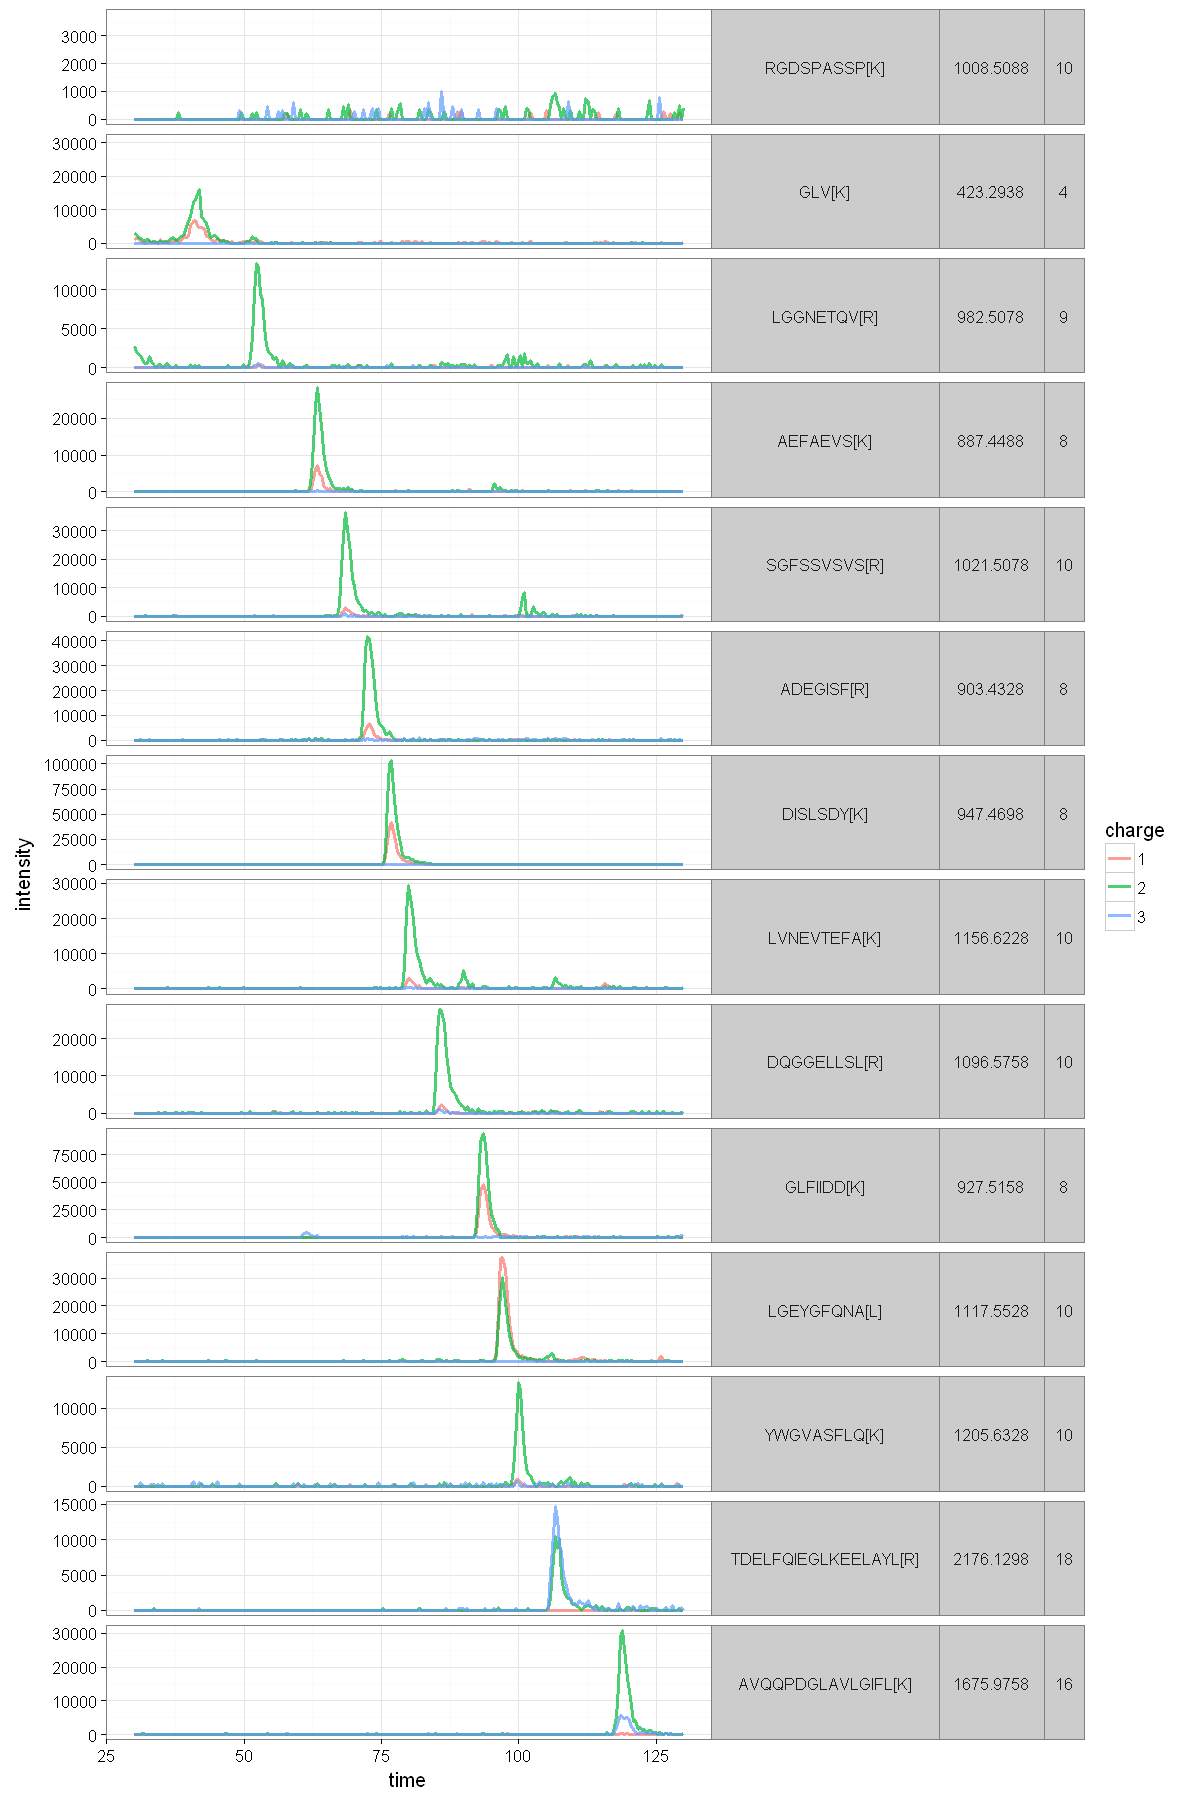

In [5]:
options(repr.plot.width = 10, repr.plot.height = 15)
cgrams %>%
    ggplot(aes(x = time, y = intensity, color = charge)) + 
        geom_line(size = 1, alpha = 0.7) +
        facet_grid(peptide+m+len ~ ., scale = 'free_y') +
        theme_bw() +
        theme(strip.text.y = element_text(angle = 0)) +
        xlim(30, 130)

ggsave('saved_data/cgram_plot.pdf', width = 10, height = 15)

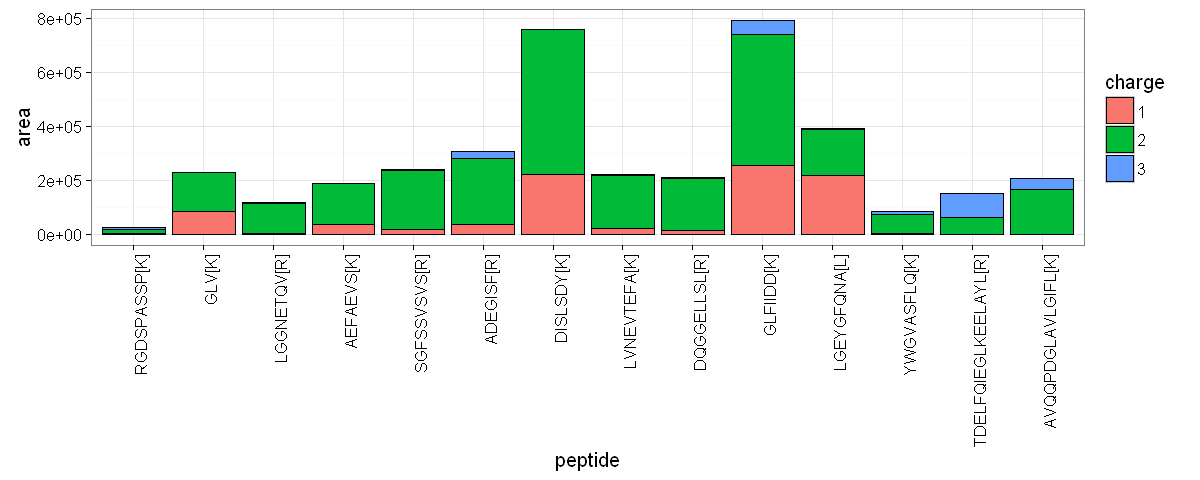

In [6]:
options(repr.plot.width = 10, repr.plot.height = 4)
cgrams %>%
    group_by(peptide, m, len, charge) %>%
    filter(time > 30, time < 130) %>%
    summarize(area = sum(intensity)) %>%
    ggplot(aes(x = peptide, y = area, fill = charge)) + 
        geom_bar(stat = 'identity', position = 'stack', color = 'black') +
        theme_bw() +
        theme(axis.text.x = element_text(angle = 90, hjust = 1))

ggsave('saved_data/bar_plot.pdf', width = 10, height = 4)